### This is a very short and simple notebook for all the beginners out there who are just stepping into data science. I have explained as much as I can. Hope you will like it

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/50-startups/50_Startups.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/50-startups/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Splitting the data into independent(X) and dependent(y) features

* Here, dependent variable will be the Profit which we have to predict => Regression Problem
* All other features(R&D, Administration, Marketing, State) will be independent variables (multiple independent features) which affect the profit values

In [4]:
X = df.iloc[:, :-1]    # independent varible
y = df.iloc[:, -1]     # dependent variable

X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [5]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

The State column in the independent variable is a categorical column with 3 unique categories - New York, California and Florida

### Convert the States into One Hot Encoding

* New York   => (1, 0, 0)
* California => (0, 1, 0)
* Florida    => (0, 0, 1) 

### Dummy Variable Trap

* New York   => (0, 0)
* California => (1, 0)
* Florida    => (0, 1)

In [6]:
# Since we do not need all the 3 columns and can work with only 2 columns for classifying the states, we will drop one column
states = pd.get_dummies(X['State'], drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


* (0, 1) => New York
* (0, 0) => California
* (1, 0) => Florida

Drop the states column from X dataset and replacing it with the one-hot encoded dataset

In [7]:
X = X.drop('State', axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [8]:
X = pd.concat([X, states], axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


### 5 different coefficients / features will be there in the linear regression equation

* Formula => B0 + B1 * x1 + B2 * x2 + B3 * x3 + B4 * x4 + B5 * x5
* B0 = index, x1 = R&D Spend, x2 = Administration, x3 = Marketing Spend, x4 = Florida, x5 = New York

### Split data into Training and Testing data and perform linear Regression and get the predictions

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [11]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

### Compare the predicted values with the real values using the R-squared value

* Formula for r-squared => 1 - (sum of residual / sum of mean)
* Sum of residual = mean(sum(y_test - y_pred)^2))
* Sum of mean = mean(sum(y_test - y_mean)^2))

* (Sum of mean > Sum of residual) always if the model is very good

* r2 value => range between 0.8 to 0.98
* r2 value => the more nearer to 1 => the better the model

In [12]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.9347068473282423

### R2 score -> 0.93 which is very near to 1 thus showing that the model used is very good model

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

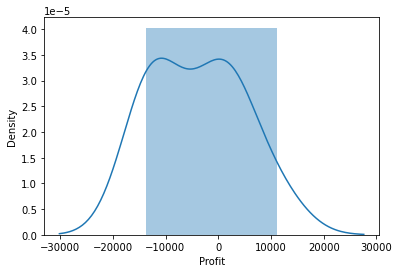

In [13]:
sns.distplot(y_pred - y_test)